In [1]:
from HybridMlp import HybridMlp
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from mealpy.swarm_based import GWO
from mealpy.swarm_based import ACOR
from mealpy.swarm_based import PSO
from mealpy.evolutionary_based import FPA
from matplotlib import pyplot as plt
import seaborn as sns



In [2]:
fp_data_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\pca datasets\\data_pca.csv"
fp_dataTest_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\pca datasets\\dataTest_pca.csv"
fp_dataTrain_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\pca datasets\\dataTrain_pca.csv"

fp_y = "C:\\Users\\Lenovo\Desktop\\practice+projex\\jupyter notebooks\\HAR\\y.csv"
fp_yTest = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\yTest.csv"
fp_yTrain = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\yTrain.csv"


data_pca = pd.read_csv(fp_data_pca)
dataTest_pca = pd.read_csv(fp_dataTest_pca)
dataTrain_pca = pd.read_csv(fp_dataTrain_pca)

y = pd.read_csv(fp_y)
yTest = pd.read_csv(fp_yTest)
yTrain = pd.read_csv(fp_yTrain)

y = y.iloc[:,1]
yTrain  = yTrain.iloc[:,1]
yTest = yTest.iloc[:,1]

In [3]:
def confusionMatrix(yTest, yhat):
        y_true = yTest
        y_pred = yhat

        # Generate confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        print("Confusion Matrix:")
        print(cm)


        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')

        print("\nMetrics:")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")

In [5]:
n_hidden_nodes = [64,64,6]
epoch = 50
pop_size = 50

# define model
model = HybridMlp(dataTrain_pca, dataTest_pca, yTrain, yTest, n_hidden_nodes, epoch, pop_size, 'GWO')
# fit model
model.training()

# access to the best model - best set of weights - the final weights of neural network
# model.solution

# evaluate on test set
yhat = model.prediction(solution=model.solution, x_data=dataTest_pca)
yhat = np.argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(yTest, yhat)
print('Accuracy: %.3f' % acc)
confusionMatrix(yTest, yhat)

  1/184 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step

c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step
184/184 ━━━━━━━━━━━━━━━

c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
n_hidden_nodes = [64,64,64,6]
epoch = 50
pop_size = 50

# define model
model = HybridMlp(dataTrain_pca, dataTest_pca, yTrain, yTest, n_hidden_nodes, epoch, pop_size, 'GWO')
# fit model
model.training()

# access to the best model - best set of weights - the final weights of neural network
# model.solution

# evaluate on test set
yhat = model.prediction(solution=model.solution, x_data=dataTest_pca)
yhat = np.argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(yTest, yhat)
print('Accuracy: %.3f' % acc)
confusionMatrix(yTest, yhat)

  1/184 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step

c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s

c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#RESULTS FOR GWO ALGORITHM ON PCA DATASET WITH 2 HIDDEN LAYERS

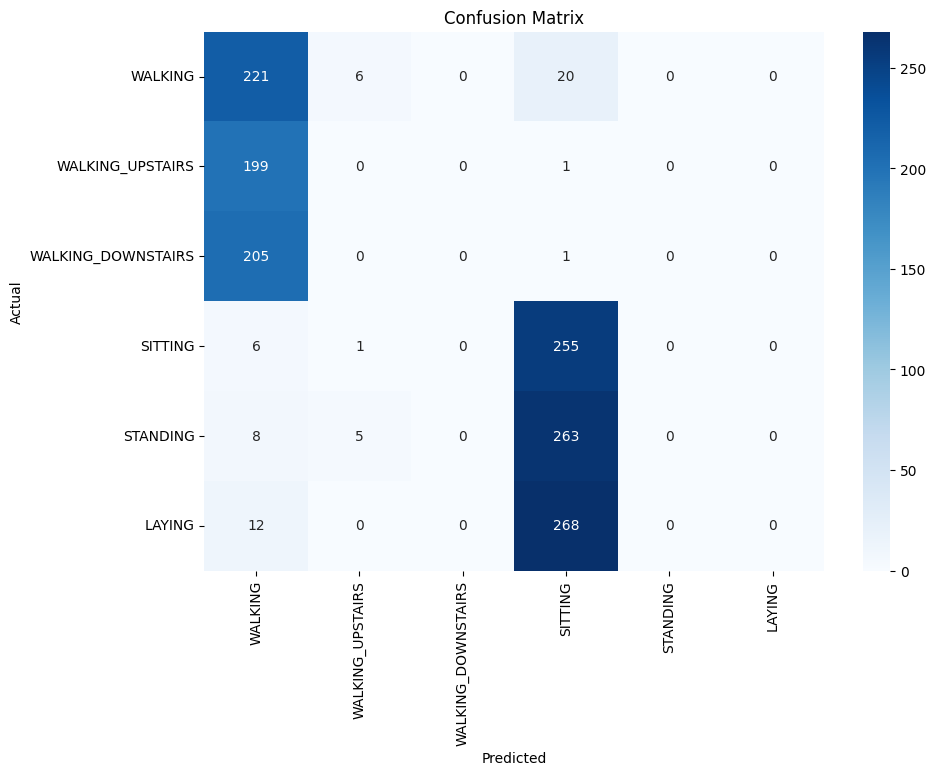

                    precision    recall  f1-score   support

           WALKING    0.33948   0.89474   0.49220       247
  WALKING_UPSTAIRS    0.00000   0.00000   0.00000       200
WALKING_DOWNSTAIRS    0.00000   0.00000   0.00000       206
           SITTING    0.31559   0.97328   0.47664       262
          STANDING    0.00000   0.00000   0.00000       276
            LAYING    0.00000   0.00000   0.00000       280

          accuracy                        0.32359      1471
         macro avg    0.10918   0.31134   0.16147      1471
      weighted avg    0.11321   0.32359   0.16754      1471

Accuracy: 0.32359


c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Given confusion matrix as a numpy array
cm = np.array([[221,   6,   0,  20,   0,   0],
 [199,0 ,  0 ,  1 ,  0 ,  0],
 [205   ,0   ,0   ,1   ,0   ,0],
 [  6,   1,   0, 255,   0 ,  0],
 [  8 ,  5,   0, 263   ,0   ,0],
 [ 12,   0 ,  0, 268,   0,   0]]
)

# Optional: Specify labels for the classes
def results(cm):
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    import numpy as np
    from sklearn.metrics import classification_report

    # Given confusion matrix


    # True labels and predicted labels
    true_labels = []
    pred_labels = []

    for i in range(len(cm)):
        for j in range(len(cm[i])):
            true_labels.extend([i] * cm[i][j])
            pred_labels.extend([j] * cm[i][j])

    # Generate classification report
    accuracy = accuracy_score(true_labels, pred_labels)


    report = classification_report(true_labels, pred_labels, target_names=labels, digits=5)
    print(report)
    print(f"Accuracy: {accuracy:.5f}")
   
    
results(cm)



#RESULTS FOR GWO ALGORITHM ON PCA DATASET WITH 3 HIDDEN LAYERS

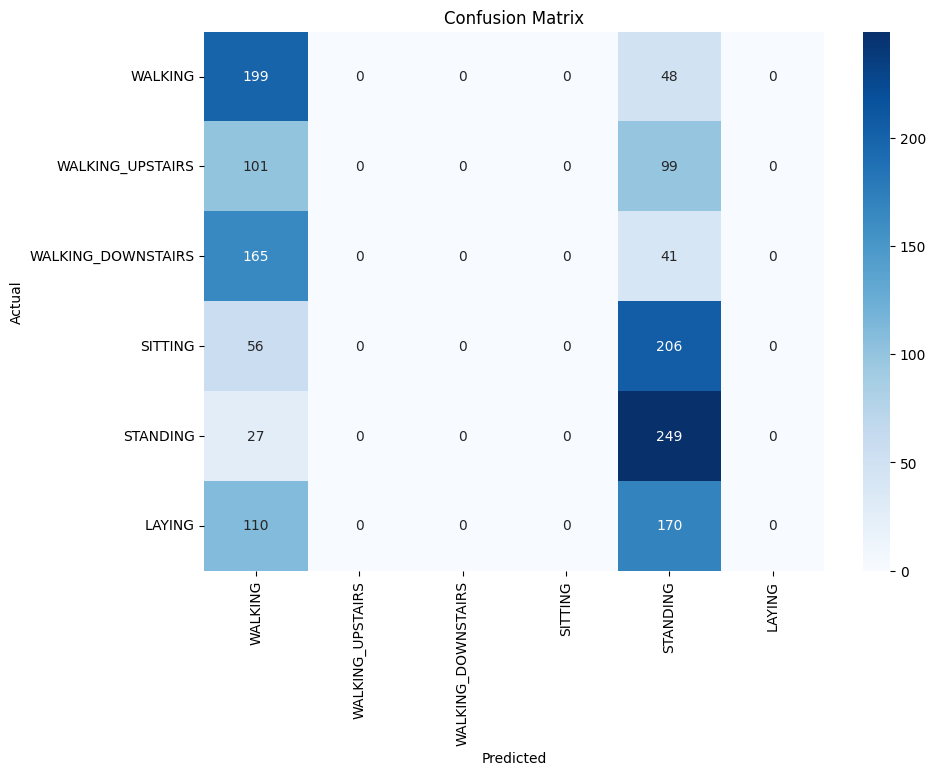

                    precision    recall  f1-score   support

           WALKING    0.30243   0.80567   0.43978       247
  WALKING_UPSTAIRS    0.00000   0.00000   0.00000       200
WALKING_DOWNSTAIRS    0.00000   0.00000   0.00000       206
           SITTING    0.00000   0.00000   0.00000       262
          STANDING    0.30627   0.90217   0.45730       276
            LAYING    0.00000   0.00000   0.00000       280

          accuracy                        0.30455      1471
         macro avg    0.10145   0.28464   0.14951      1471
      weighted avg    0.10825   0.30455   0.15965      1471

Accuracy: 0.30455


c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [9]:
cm = np.array([[199,   0,   0,   0,  48,   0],
 [101  , 0  , 0  , 0  ,99  , 0],
 [165,   0,   0,   0,  41,   0],
 [ 56  , 0   ,0  , 0 ,206 ,  0],
 [ 27 ,  0 ,  0 ,  0 ,249 ,  0],
[110,   0,   0,   0, 170,   0]])
results(cm)